In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc
import math

In [2]:
#Funciones Auxiliares
def sumaV(x,y):
    '''Suma 2 vectores dados'''
    a,b=x
    c,d=y
    return (a+c,b+d)
def multV(n,a):
    '''Multiplica un vector a por una constante n'''
    a1,a2 = a
    return (a1*n,a2*n)
def rota(vect, theta):
    '''Rota un vector en un ángulo en Theta grados'''
    ang = float((theta/180.0)*math.pi)
    (x,y) = vect
    vr = ((math.cos(ang)*x)-(math.sin(ang)*y), (math.sin(ang)*x)+(math.cos(ang)*y))
    return vr

In [3]:
class Atomo:
    '''Clase que define un atomo en el sistema'''
    def __init__(self, pos, color='black'):
        '''Inicializa el objeto Atomo usando como entradas su posición (x,y) pos y su color caracteristico color'''
        self.pos = pos
        self.color = color
        self.enlaces = []

    def printAtomo(self, r, axs):
        '''Imprime un Atomo en un Patch en el axs señalado'''
        axs.add_patch(plt.Circle((self.pos), r , color=self.color))

    def setEnlace(self, atm):
        '''Enlaza 2 Atomos'''
        self.enlaces.append(atm)
        atm.enlaces.append(self)
        return 1


In [30]:
class Celda:
    def __init__(self, pos, u, v, atms, enls):
        self.pos = pos
        self.u
    
class Malla:
    def __init__(self, u, v, theta = 0.0):
        self.OriginalU = u
        self.OriginalV = v
        if theta==0.0:
            self.u = u
            self.v = v
        else:
            self.u = rota(u,theta)
            self.v = rota(v,theta)
        self.CeldaMin = None
    
    def setCeldaMin(self, celda):
        self.CeldaMin = celda

In [28]:
def muestra(mallas, t = 0.5, name = '',mm = None):
    '''Impime en pantalla la lista de Mallas dadas, puede señalarse un grosor de dibujo t y un nombre name
De tener nombre se creará una imagén con dicho nombre'''
    fig, axs = plt.subplots()
    atms, enls, col = [], [], []
    i = 0
    for m in mallas:
        i+=1
        print("Malla",i,":",len(m.aPos),"atomos,",len(m.enls),"enlaces")
        atms = atms+m.aPos
        col = col+m.aCol
        enls = enls+m.enls
    print("\tTotal:",len(atms),"atomos,",len(enls),"enlaces")
    lis = np.array(atms)
    xs, ys = lis[:,0], lis[:,1]
    axs.scatter(xs,ys, color=col,s=t)
    lc = mc.LineCollection(np.array(enls), colors='black', linewidths=(t/10))
    axs.add_collection(lc)
    if (mm is not None):
        mm.printWeb(axs)
    #axs.axes.xaxis.set_visible(False)
    #axs.axes.yaxis.set_visible(False)
    axs.autoscale_view(tight=False)
    if name!='':
        plt.savefig(name,dpi=900, bbox_inches='tight')
    plt.show()
    axs.cla()
    plt.clf()
    plt.close()
    return 1

In [32]:
#Creamos una Red exagonal regular usando los vectores u=(l*sqrt(3),l) y v=(l*sqrt(3),-l) 
l = 2
h = l*math.sqrt(3)
malla1 = Malla((h,-l),(h,l))
malla1.crea(1,1,2,colors=['red','darkgreen']);
malla2 = Malla((h,-l),(h,l))
malla2.crea(1,-1,2,colors=['red','darkgreen']);

Malla 1 : 8 atomos, 12 enlaces
	Total: 8 atomos, 12 enlaces


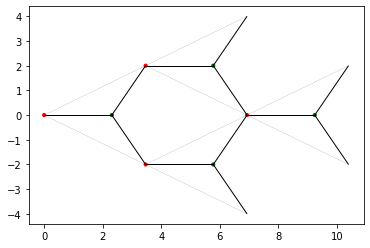

Malla 1 : 8 atomos, 12 enlaces
	Total: 8 atomos, 12 enlaces


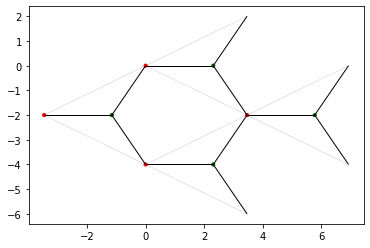

Malla 1 : 8 atomos, 12 enlaces
Malla 2 : 8 atomos, 12 enlaces
	Total: 16 atomos, 24 enlaces


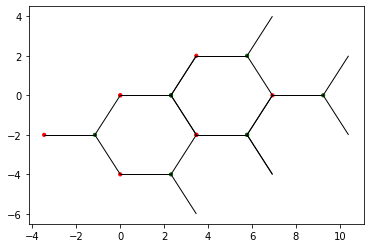

1

In [34]:
muestra([malla1],t=10,mm=malla1)
muestra([malla2],t=10,mm=malla2)
muestra([malla1,malla2],t=10)